In [ ]:
from keras.datasets import cifar10
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
x_mean = np.mean(x_train, axis = (0,1,2) )
x_std = np.std(x_train,axis=(0,1,2))

x_train = (x_train - x_mean)/ x_std
x_test = (x_test - x_mean)/x_std


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state =777)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.optimizers import Adam
from keras.regularizers import l2

In [ ]:
model = Sequential([
    Conv2D(filters = 32, kernel_size=3, padding='same', activation = 'relu', input_shape=(32,32,3)),
    Conv2D(filters = 32, kernel_size=3, padding='same', activation = 'relu'),
    MaxPool2D(pool_size = (2,2),strides = 2, padding = 'same'),

    Conv2D(filters = 64, kernel_size=3, padding='same', activation = 'relu'),
    Conv2D(filters = 64, kernel_size=3, padding='same', activation = 'relu'),
    MaxPool2D(pool_size = (2,2),strides = 2, padding = 'same'),

    Conv2D(filters = 128, kernel_size=3, padding='same', activation = 'relu'),
    Conv2D(filters = 128, kernel_size=3, padding='same', activation = 'relu'),
    MaxPool2D(pool_size = (2,2),strides = 2, padding = 'same'),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer = l2(0.001)),
    Dense(10, activation='softmax')



])


model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))


Epoch 1/30
1094/1094 [==============================] - 19s 9ms/step - loss: 1.9105 - acc: 0.4168 - val_loss: 1.5949 - val_acc: 0.5061
Epoch 2/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.4872 - acc: 0.5517 - val_loss: 1.3613 - val_acc: 0.5875
Epoch 3/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.2840 - acc: 0.6217 - val_loss: 1.2208 - val_acc: 0.6401
Epoch 4/30
1094/1094 [==============================] - 9s 8ms/step - loss: 1.1351 - acc: 0.6709 - val_loss: 1.1756 - val_acc: 0.6505
Epoch 5/30
1094/1094 [==============================] - 9s 9ms/step - loss: 1.0224 - acc: 0.7028 - val_loss: 1.0724 - val_acc: 0.6784
Epoch 6/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.9279 - acc: 0.7331 - val_loss: 1.0183 - val_acc: 0.6939
Epoch 7/30
1094/1094 [==============================] - 8s 7ms/step - loss: 0.8468 - acc: 0.7611 - val_loss: 0.9815 - val_acc: 0.7087
Epoch 8/30
1094/1094 [==============================] - 9s 8m

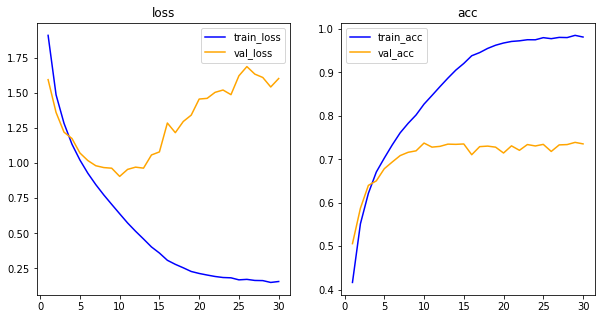

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('acc')
ax2.legend()

plt.show()